In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_hist(data,names):
    fig, ax = plt.subplots(figsize = (15,8))
    width=0.3
    bins = map(lambda x: x-width/2,range(1,len(data)+1))
    ax.bar(bins,data,width=width)
    ax.set_xticks(map(lambda x: x, range(1,len(data)+1)))
    ax.set_xticklabels(names,rotation=45)
    plt.title('Letter Count Across Corrected Corpus')
    plt.show()

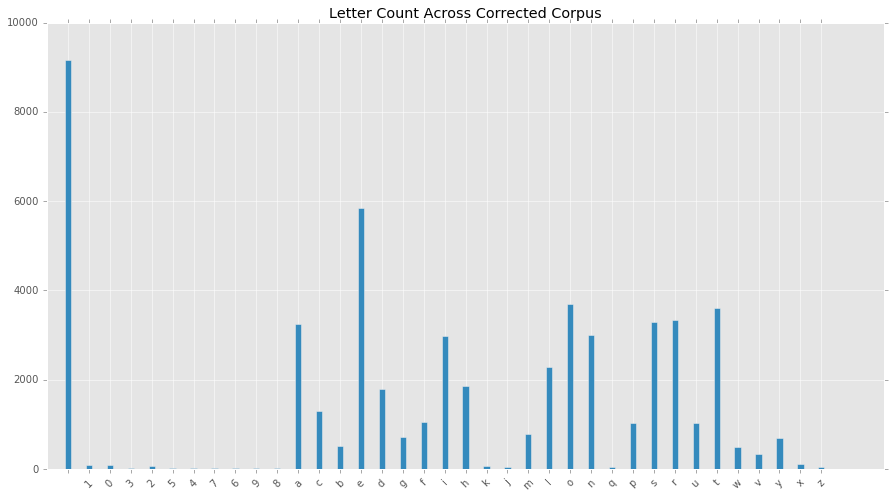

In [30]:
docs = ['train_text/'+f for f in os.listdir('train_text/') if f.endswith('.txt')]
text = []
for doc in docs:
    text.append(read_text(doc))
text = ' '.join(text)

c = Counter(text)
plot_hist(c.values(), c.keys())
